## Initializing the code by importing Libraries
      As always we first need to import all the import or those libraries that we need in this code. Bascially libraries are the premade code with alot of functions and methods to make developer job easy, mean they dont need to keep write each code all the time, they can just import it from library. Like for a sum function, if developer need to find sum of some values then he need to write a whole code for sum fucntion and then move on but by using libraries he/she doesn't need to write code for sum function as they already have it, all he/she need to do is write sum() and that operation perform. In other words Lib are made to make developer job easy.

In this code I imported two libraries **Numpy** and **Pandas**
1. Where Numpy will use to generate array 
      - Array r basically the type of variables that store more than one values inside then, like a matrix.
2. Pandas will use to access data, manipluate it, perform operations on it like removing, inserting, replacing values etc.
3. And matplot as plt, it use to generate graphs for visual impact of datasets

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv('Data/movies.csv')

In [37]:
data.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [38]:
data = data[['MOVIES','YEAR','RATING','VOTES','RunTime']]
data.head()

,MOVIES,YEAR,RATING,VOTES,RunTime
0,Blood Red Sky,(2021),6.1,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),5.0,"17,870",25.0
2,The Walking Dead,(2010–2022),8.2,"885,805",44.0
3,Rick and Morty,(2013– ),9.2,"414,849",23.0
4,Army of Thieves,(2021),NaN,NaN,NaN


In [39]:
data.isnull().sum()

MOVIES        0
YEAR        644
RATING     1820
VOTES      1820
RunTime    2958
dtype: int64

In [40]:
data['VOTES'] = pd.to_numeric(data['VOTES'].str.replace(',', ''), errors='coerce')
data['YEAR'] = data['YEAR'].str.extract(r'(\d{4})').astype(float)
data = data.fillna(data.mean(numeric_only=True))

In [41]:
data.isnull().sum()

MOVIES     0
YEAR       0
RATING     0
VOTES      0
RunTime    0
dtype: int64

C:\Users\Hassan\AppData\Local\Temp\ipykernel_10644\4110854049.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('Runtime_bin')['RATING'].mean()


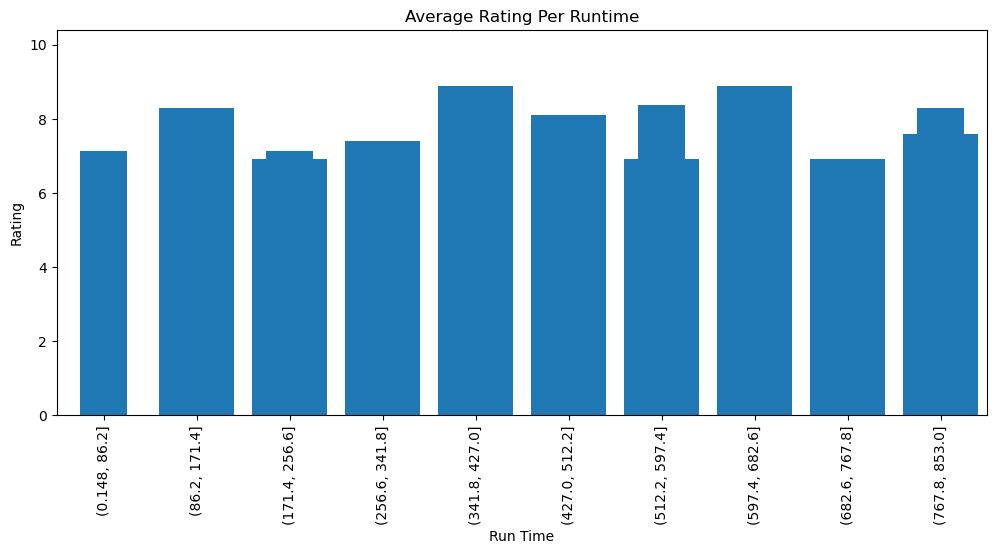

In [53]:
data['Runtime_bin'] = pd.cut(data['RunTime'],bins=10)
grouped = data.groupby('Runtime_bin')['RATING'].mean()
grouped.plot(kind='bar', figsize=(12, 5))
plt.bar(data['RunTime'],data['RATING'])
plt.xlabel('Run Time')
plt.ylabel('Rating')
plt.title('Average Rating Per Runtime')
plt.show()

C:\Users\Hassan\AppData\Local\Temp\ipykernel_10644\3961298857.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('vote_bins')['RATING'].mean()


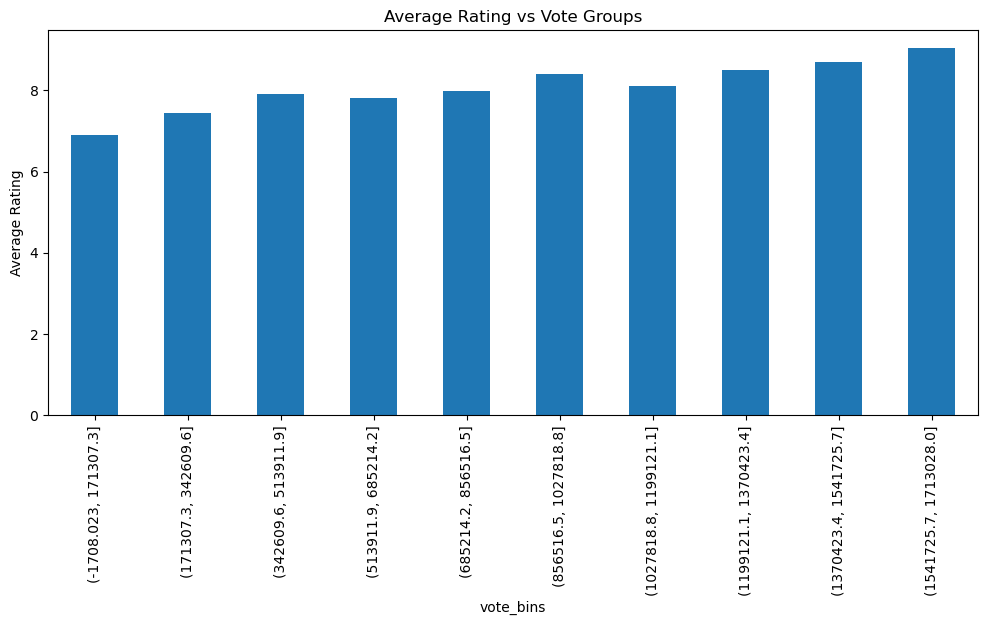

In [52]:
data['vote_bins'] = pd.cut(data['VOTES'], bins=10)
grouped = data.groupby('vote_bins')['RATING'].mean()
grouped.plot(kind='bar', figsize=(12, 5))
plt.ylabel('Average Rating')
plt.title('Average Rating vs Vote Groups')
plt.show()

In [57]:
top_movies = data.sort_values(by='RATING',ascending=False).head(10)
top_movies

,MOVIES,YEAR,RATING,VOTES,RunTime,vote_bins,Runtime_bin
7640,BoJack Horseman,2014.0,9.9,12369.0,26.0,"(-1708.023, 171307.3]","(0.148, 86.2]"
8510,Avatar: The Last Airbender,2005.0,9.9,8813.0,92.0,"(-1708.023, 171307.3]","(86.2, 171.4]"
8509,Avatar: The Last Airbender,2005.0,9.8,5283.0,92.0,"(-1708.023, 171307.3]","(86.2, 171.4]"
9892,Dexter,2006.0,9.8,11638.0,51.0,"(-1708.023, 171307.3]","(0.148, 86.2]"
8637,She-Ra and the Princesses of Power,2018.0,9.7,1434.0,24.0,"(-1708.023, 171307.3]","(0.148, 86.2]"
8541,The Midnight Gospel,2020.0,9.7,1731.0,36.0,"(-1708.023, 171307.3]","(0.148, 86.2]"
8767,Dark,2017.0,9.7,20230.0,73.0,"(-1708.023, 171307.3]","(0.148, 86.2]"
7159,Avatar: The Last Airbender,2005.0,9.7,2770.0,24.0,"(-1708.023, 171307.3]","(0.148, 86.2]"
8629,She-Ra and the Princesses of Power,2018.0,9.7,1262.0,24.0,"(-1708.023, 171307.3]","(0.148, 86.2]"
7641,BoJack Horseman,2014.0,9.6,4910.0,27.0,"(-1708.023, 171307.3]","(0.148, 86.2]"


Text(0.5, 1.0, 'Movies Comparzion')

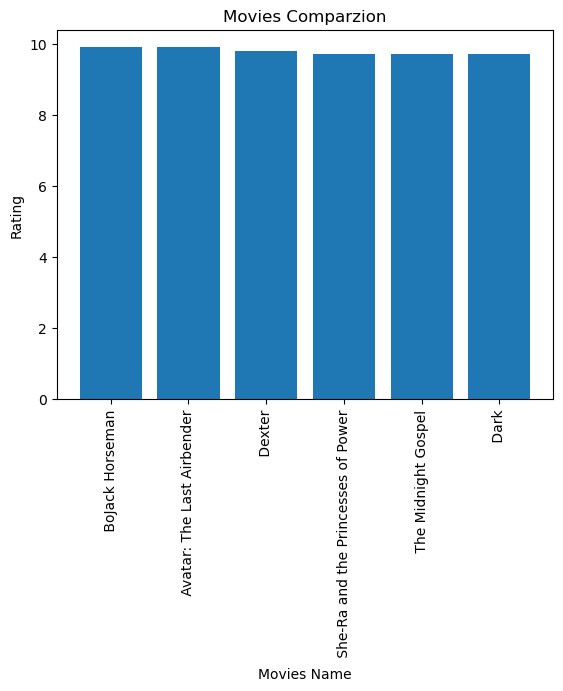

In [ ]:
plt.bar( top_movies['MOVIES'], top_movies['RATING'] )
# plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
plt.xlabel('Movies Name')
plt.ylabel('Rating')
plt.title('Movies Comparzion')

In [69]:
import seaborn as sns

d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


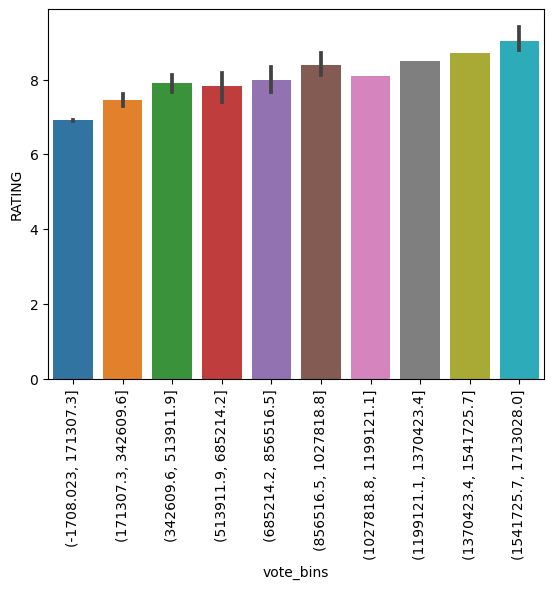

In [ ]:
sns.barplot(data=data,x='vote_bins',y='RATING')
plt.xticks(rotation=90)
plt.show()

d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


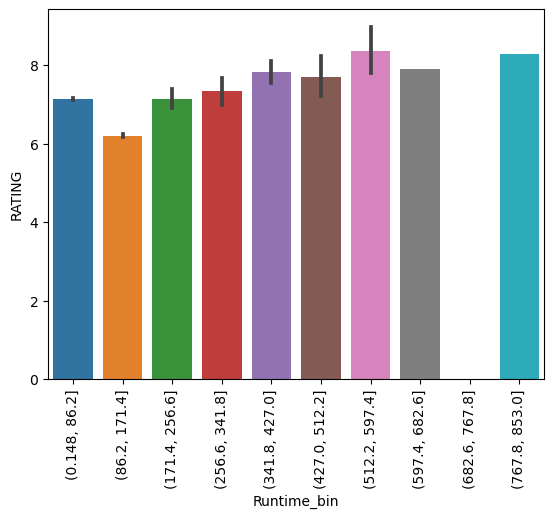

In [73]:
sns.barplot(data=data,x='Runtime_bin',y='RATING')
plt.xticks(rotation=90)
plt.show()

d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


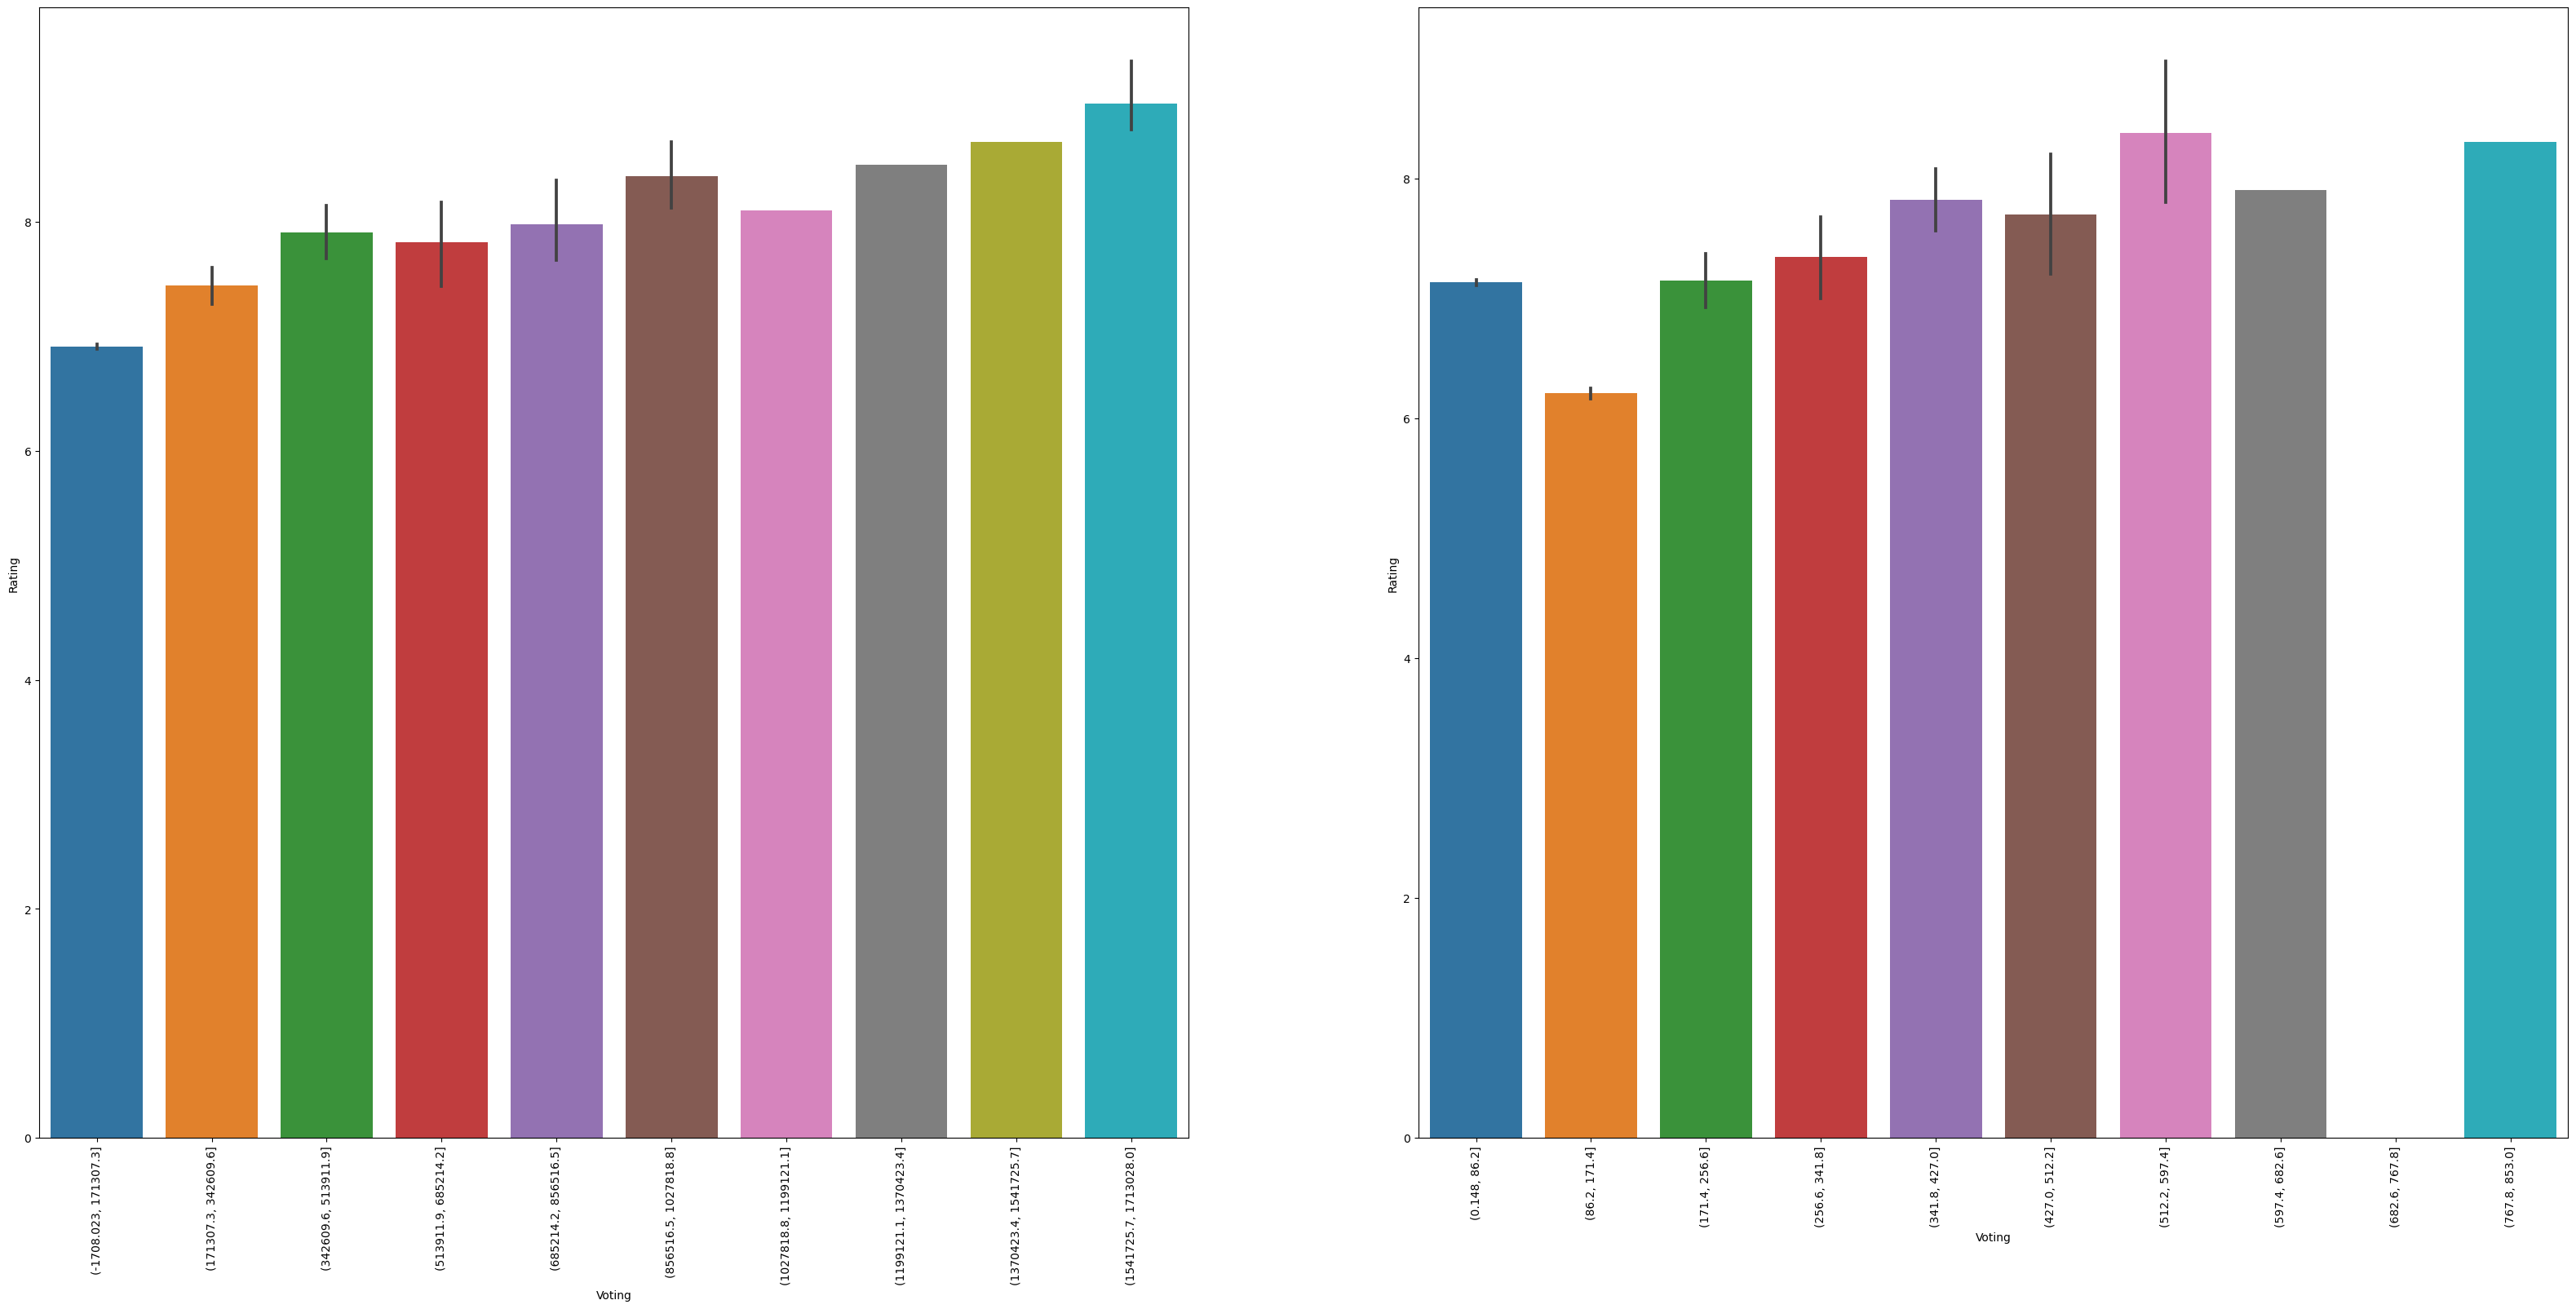

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(40,18))

ax1 = sns.barplot(data=data, x='vote_bins',y='RATING', ax= ax[0])
ax1.tick_params(axis='x', rotation=90) 
ax1.set_xlabel('Voting')
ax1.set_ylabel('Rating')
ax1.set_label('Comparzion between Movies Voting and rating')


ax2 = sns.barplot(data=data,x='Runtime_bin',y='RATING',ax= ax[1])
ax2.tick_params(axis='x', rotation=90) 
ax2.set_xlabel('Voting')
ax2.set_ylabel('Rating')
ax2.set_label('Comparzion between Movies Runtime and rating')